In [1]:
import os
import keras
import numpy as np
from glob import glob 
from tqdm import tqdm 
import tensorflow as tf
from PIL import Image

# Data
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

# Model 
from keras import Sequential
from keras.layers import GlobalAvgPool2D, Dense, Dropout
from keras.models import load_model

# Pre-Trained Models
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

2023-04-30 11:12:27.916688: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
class_names = [i for i in sorted(os.listdir('/Users/shihhsuanlo/info550_final_project/coffee_data/train')) if i != '.DS_Store']
n_classes = len(class_names)
class_names

['Dark', 'Green', 'Light', 'Medium']

In [3]:
data = pd.read_csv('/Users/shihhsuanlo/info550_final_project/coffee_data/Coffee Bean.csv')
data.head()

,class index,filepaths,labels,data set
0,0,train/Dark/dark (1).png,Dark,train
1,0,train/Dark/dark (10).png,Dark,train
2,0,train/Dark/dark (100).png,Dark,train
3,0,train/Dark/dark (101).png,Dark,train
4,0,train/Dark/dark (102).png,Dark,train


In [4]:
# Initialize Generator
train_gen = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True, 
    rotation_range=20, 
    validation_split=0.2)

test_gen = ImageDataGenerator(rescale=1./255)

# Load Data
path = "/Users/shihhsuanlo/info550_final_project/coffee_data/"
train_ds = train_gen.flow_from_directory(path + "train", target_size=(256,256), shuffle=True, batch_size=32, subset="training", class_mode='binary')
valid_ds = train_gen.flow_from_directory(path + "train", target_size=(256,256), shuffle=True, batch_size=32, subset="validation", class_mode='binary')
test_ds = train_gen.flow_from_directory(path + "test", target_size=(256,256), shuffle=True, batch_size=32, class_mode='binary')


Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [5]:
def show_image(img, title=None):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

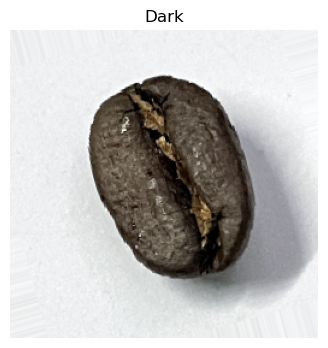

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,4))

# Load a single image from the dataset
(images, labels) = next(iter(train_ds))
_id = 0
image = images[_id]
label = labels[_id]

plt.imshow(image)
plt.title(class_names[int(label)])
plt.axis('off')

plt.show()

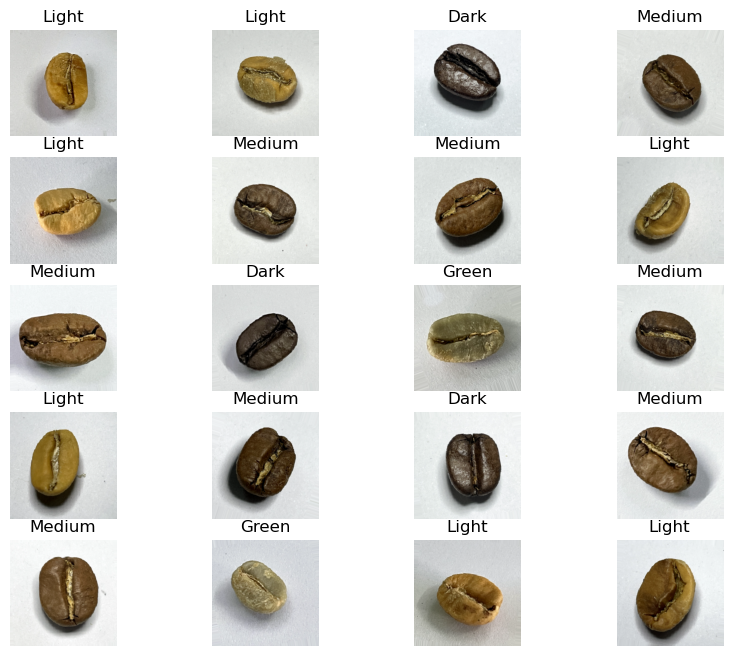

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,8))
i=1
for images, labels in iter(train_ds):
    
    _id = np.random.randint(len(images))
    image = images[_id]
    label = labels[_id]

    plt.subplot(5,4,i)
    plt.imshow(image)
    plt.title(class_names[int(label)])
    plt.axis('off')

    i+=1
    if i>=21: break
plt.show()



In [8]:
# Initialize Base Model
name = "ResNet50V2"
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(256,256,3))
base_model.trainable = False

base_model2= ResNet50(include_top=False, weights='imagenet', input_shape=(256,256,3))
base_model2.trainable = False


# Model
resnet_50V2 = Sequential([
    
    
    base_model, 
    GlobalAvgPool2D(),
    Dense(256, activation='relu'),
    
#     base_model2,
#     GlobalAvgPool2D(),
#     Dense(256, activation='relu'),
#     base_model3,
#     GlobalAvgPool2D(),
#     Dense(256, activation='relu'),
#     base_model4,
#     GlobalAvgPool2D(),
#     Dense(256, activation='relu'),
#     base_model5,
#     GlobalAvgPool2D(),
#     Dense(256, activation='relu'),
    
    
    
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])


# Compile
resnet_50V2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint(name + ".h5", save_best_only=True)]

# Training
resnet_50V2.fit(train_ds, validation_data=valid_ds, epochs=50, callbacks=cbs)

2023-04-30 11:13:05.671801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


94765736/94765736 [==============================] - 7s 0us/step
Epoch 1/50
30/30 [==============================] - 72s 2s/step - loss: 0.6169 - accuracy: 0.7854 - val_loss: 0.1901 - val_accuracy: 0.9375
Epoch 2/50
30/30 [==============================] - 72s 2s/step - loss: 0.1477 - accuracy: 0.9521 - val_loss: 0.1392 - val_accuracy: 0.9458
Epoch 3/50
30/30 [==============================] - 70s 2s/step - loss: 0.1126 - accuracy: 0.9573 - val_loss: 0.1159 - val_accuracy: 0.9458
Epoch 4/50
30/30 [==============================] - 70s 2s/step - loss: 0.0750 - accuracy: 0.9760 - val_loss: 0.0846 - val_accuracy: 0.9792
Epoch 5/50
30/30 [==============================] - 70s 2s/step - loss: 0.0802 - accuracy: 0.9708 - val_loss: 0.1026 - val_accuracy: 0.9708
Epoch 6/50
30/30 [==============================] - 74s 2s/step - loss: 0.0701 - accuracy: 0.9781 - val_loss: 0.0799 - val_accuracy: 0.9708
Epoch 7/50
30/30 [==============================] - 70s 2s/step - loss: 0.0475 - accuracy: 0.98

In [11]:
resnet_50V2.evaluate(test_ds)

13/13 [==============================] - 25s 2s/step - loss: 0.0313 - accuracy: 0.9925


[0.03131096065044403, 0.9925000071525574]

1/1 [==============================] - 0s 93ms/step


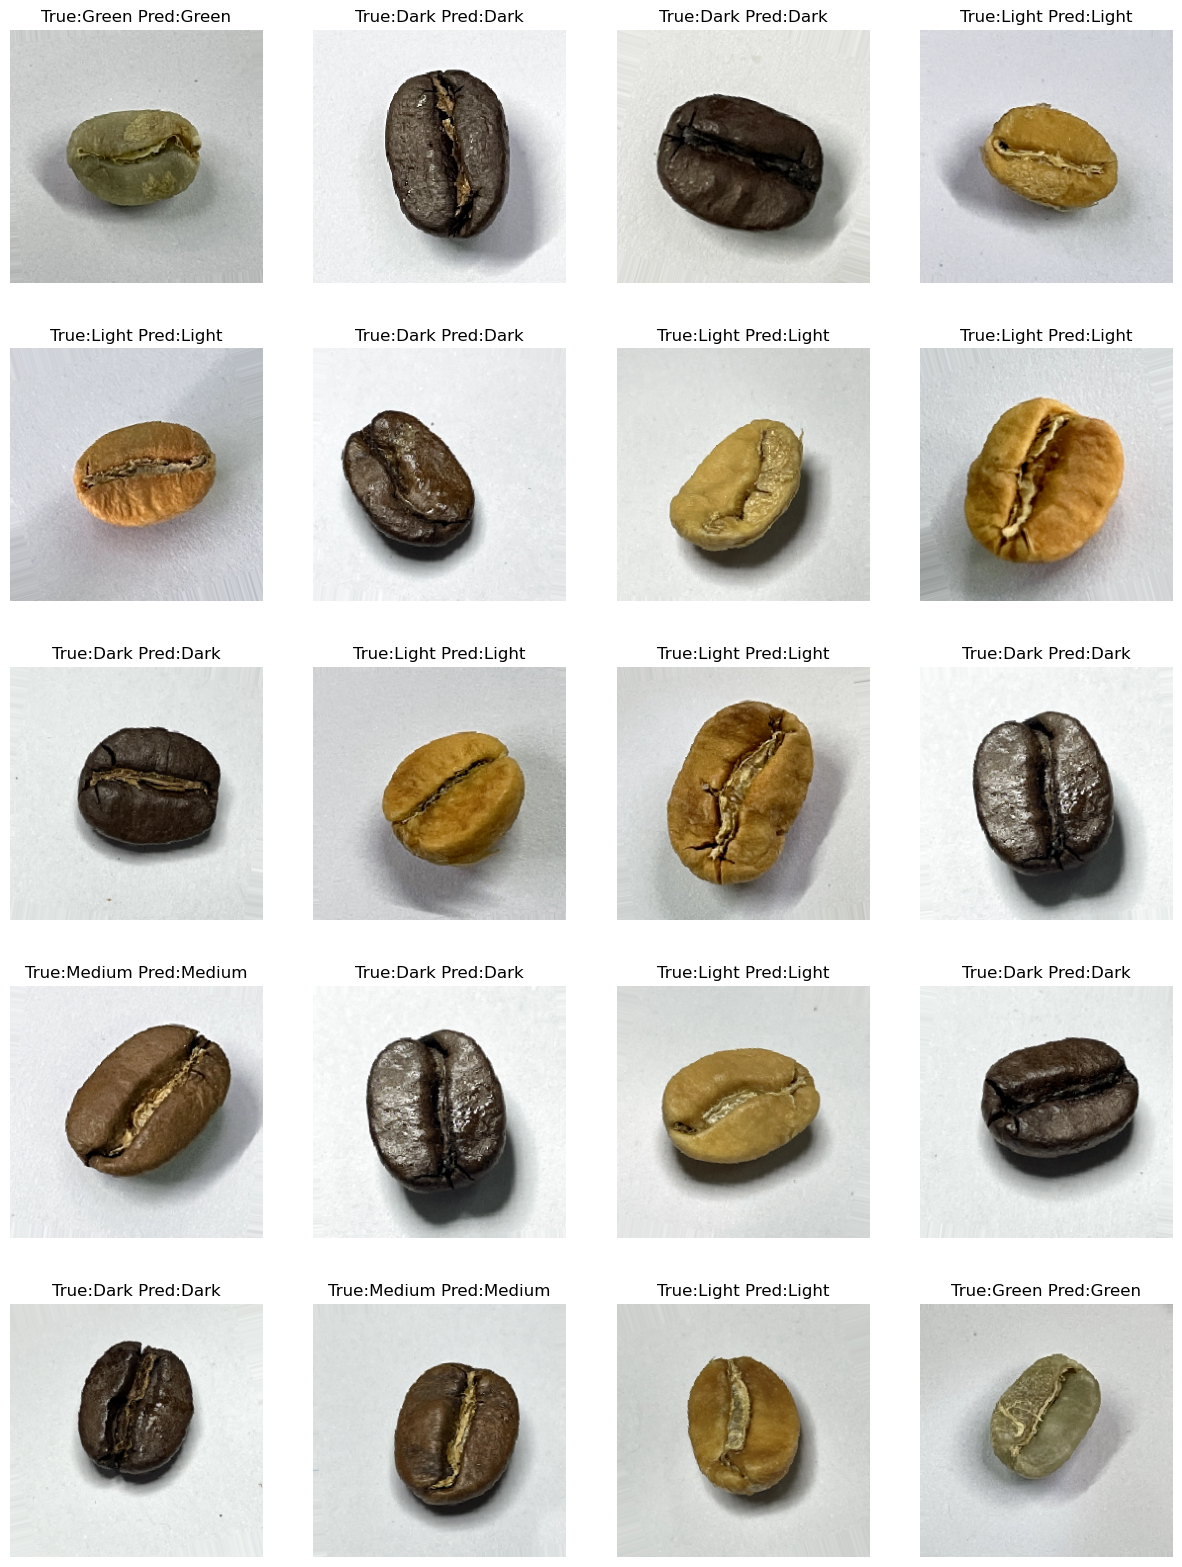

In [9]:
plt.figure(figsize=(15,20))
i=1
for images, labels in iter(test_ds):
    
    # Load Random Image, label
    id = np.random.randint(len(images))
    image = images[id]
    label = labels[id]

    # Make Prediction
    pred_label = class_names[int(np.argmax(resnet_50V2.predict(image[np.newaxis,...])))]
    plt.subplot(5,4,i)
    plt.imshow(image)
    plt.title(f'True:{class_names[int(label)]} Pred:{pred_label}')
    plt.axis('off')
    

#     # Plot Prediction
#     plt.subplot(5,4,i)
#     show_image(image, title=f"Org : {class_names[int(label)]} Pred : {pred_label}")

    # Increment and Break
    i+=1
    if i>=21: break

# Show
plt.show()

In [ ]:
# Initialize Base Model
name2 = "InceptionV3"
base_model2 = InceptionV3(include_top=False, weights='imagenet', input_shape=(256,256,3))
base_model2.trainable = False



# Model
model2 = Sequential([
    
    
    base_model2, 
    GlobalAvgPool2D(),
    Dense(256, activation='relu'),
    
#     base_model2,
#     GlobalAvgPool2D(),
#     Dense(256, activation='relu'),
#     base_model3,
#     GlobalAvgPool2D(),
#     Dense(256, activation='relu'),
#     base_model4,
#     GlobalAvgPool2D(),
#     Dense(256, activation='relu'),
#     base_model5,
#     GlobalAvgPool2D(),
#     Dense(256, activation='relu'),
    
    
    
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])


# Compile
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint("InceptionV3" + ".h5", save_best_only=True)]

# Training
model2.fit(train_ds, validation_data=valid_ds, epochs=10, callbacks=cbs)

In [ ]:
plt.figure(figsize=(15,20))
i=1
for images, labels in iter(test_ds):
    
    # Load Random Image, label
    id = np.random.randint(len(images))
    image = images[id]
    label = labels[id]

    # Make Prediction
    pred_label = class_names[int(np.argmax(model2.predict(image[np.newaxis,...])))]
    plt.subplot(5,4,i)
    plt.imshow(image)
    plt.title(f'True:{class_names[int(label)]} Pred:{pred_label}')
    plt.axis('off')
    

#     # Plot Prediction
#     plt.subplot(5,4,i)
#     show_image(image, title=f"Org : {class_names[int(label)]} Pred : {pred_label}")

    # Increment and Break
    i+=1
    if i>=21: break

# Show
plt.show()

In [ ]:
model2.evaluate(test_ds)